In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Singular Input

## On Linear Data

In [2]:
input_layer = [1]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data
feature_data = y_data[:-1].reshape(-1, 1, 1)
target_data = y_data[1:].reshape(-1, 1, 1)

n_epochs = 25
learning_rate = 0.0001

In [3]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn.generate_m()
bnn.generate_v()
bnn.train(n_epochs)

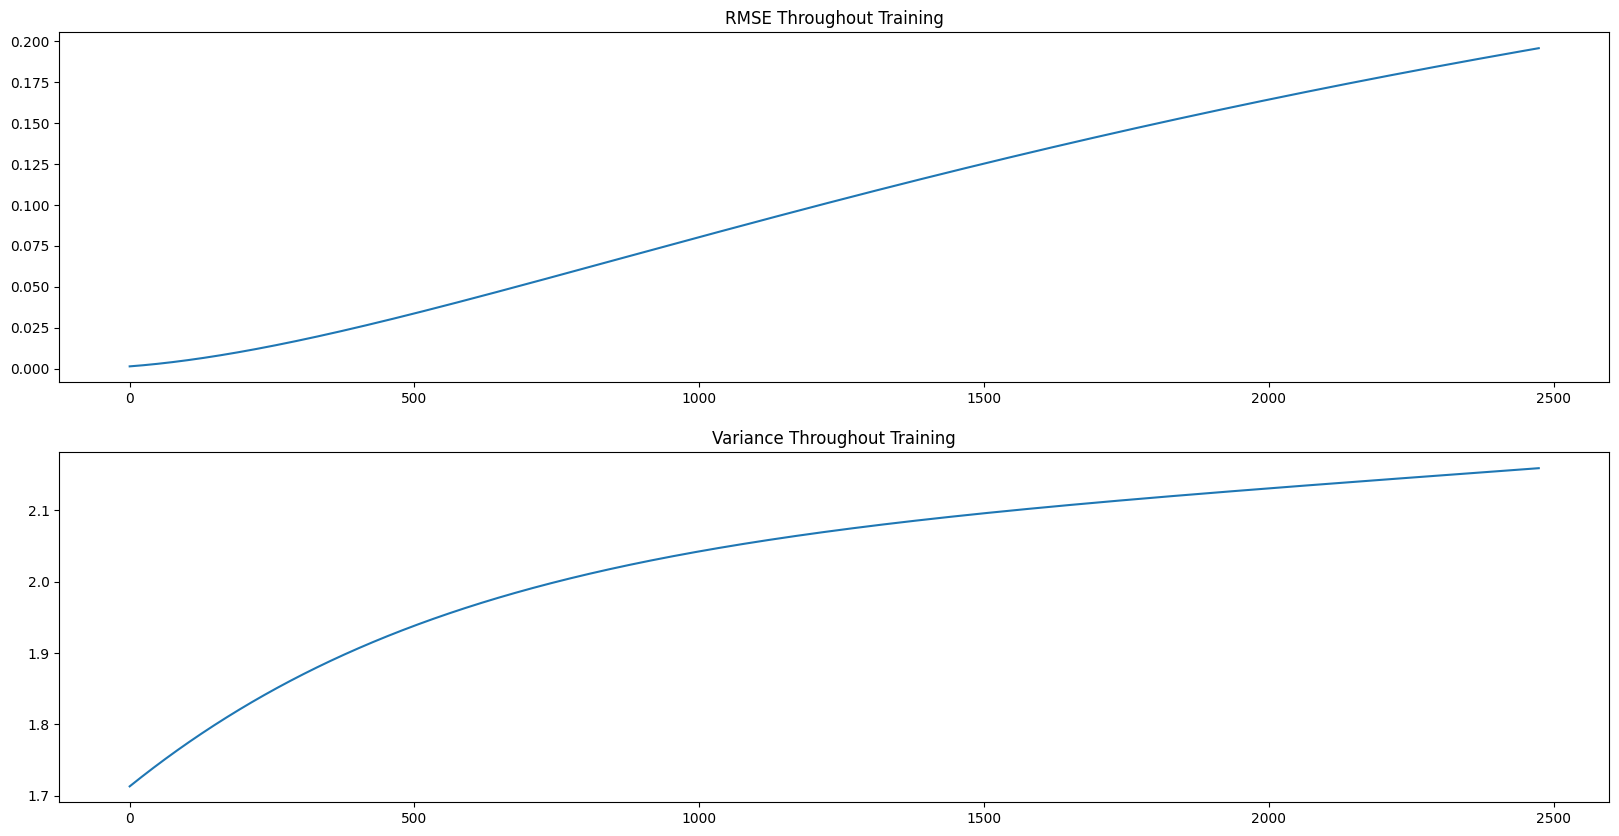

In [4]:
bnn.visualize_performance()

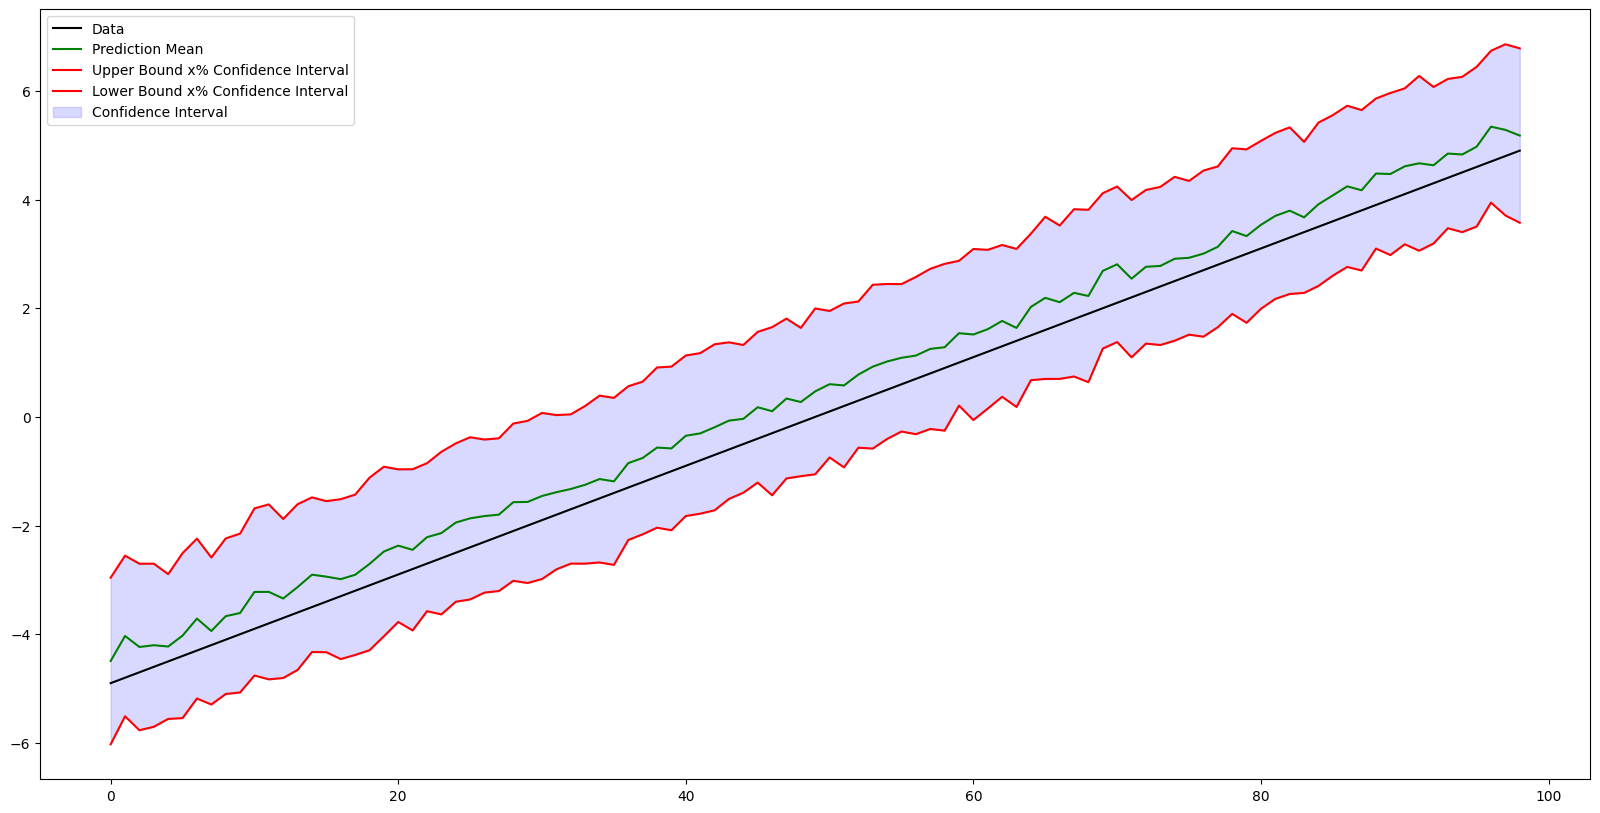

In [5]:
bnn.predict_on_seen_data()
bnn.visualize_predictions()

## On Sinusoidal Data

In [6]:
input_layer = [1]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)
feature_data = y_data[:-1].reshape(-1, 1, 1)
target_data = y_data[1:].reshape(-1, 1, 1)

n_epochs = 50
learning_rate = 0.001

In [7]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn.generate_m()
bnn.generate_v()
bnn.train(n_epochs)

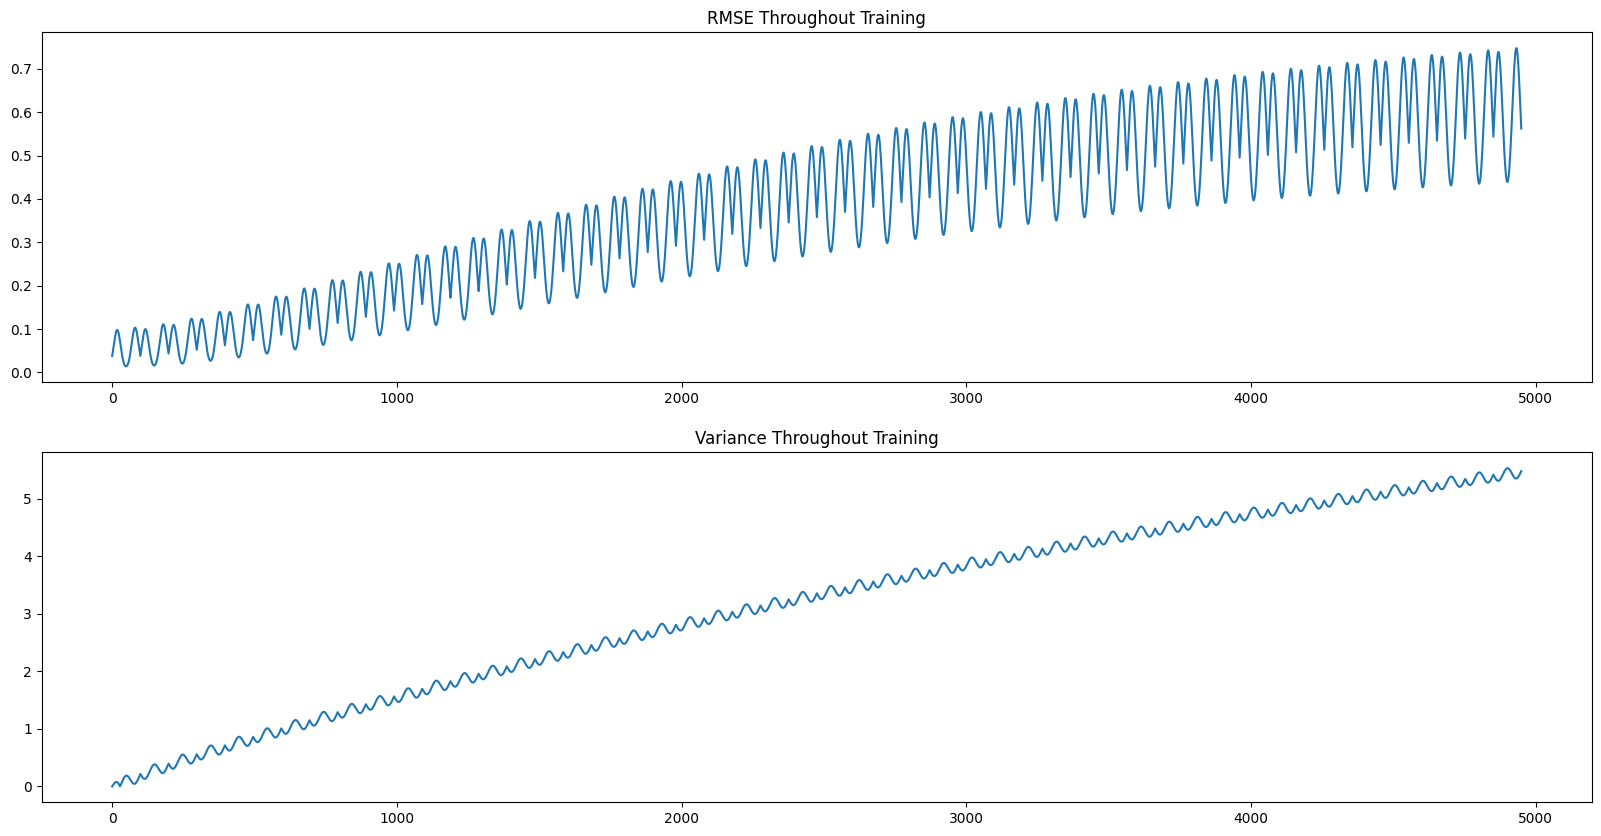

In [8]:
bnn.visualize_performance()

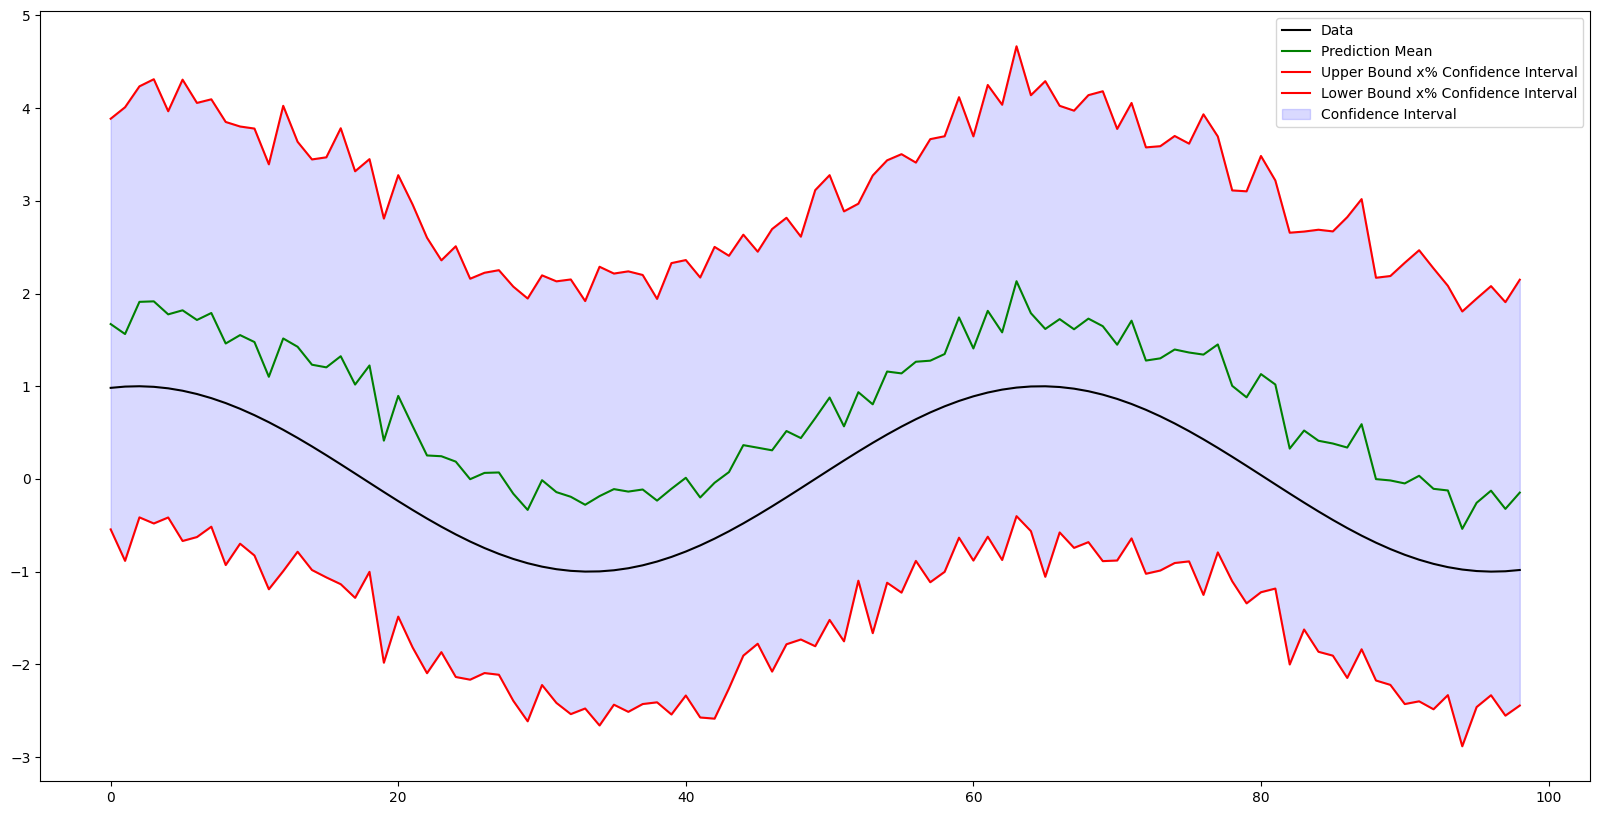

In [9]:
bnn.predict_on_seen_data()
bnn.visualize_predictions()

# Model Performance On Multiple Inputs

In [10]:
def generate_windowed_dataset(data, window_size):
    return np.array([y_data[i:i+window_size].reshape(-1, 1) for i in range(len(y_data) - window_size + 1)])

## On Linear Data

In [11]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

window_size = 2
feature_data = generate_windowed_dataset(y_data, window_size)
target_data = y_data.reshape(-1, 1, 1)[window_size-1:]

n_epochs = 25
learning_rate = 0.001

In [12]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn.generate_m()
bnn.generate_v()
bnn.train(n_epochs)

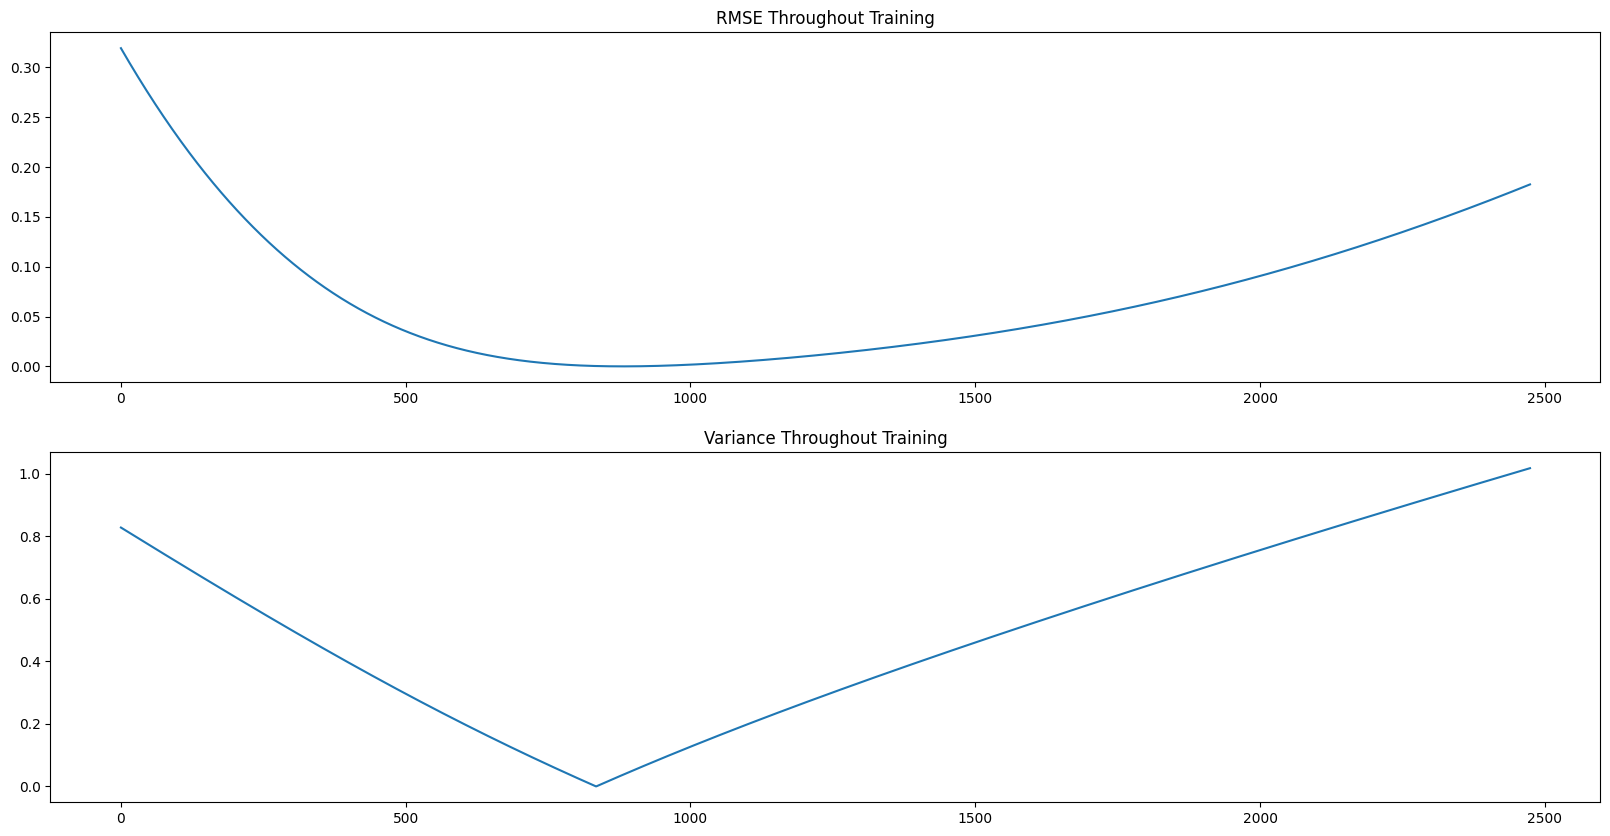

In [13]:
bnn.visualize_performance()

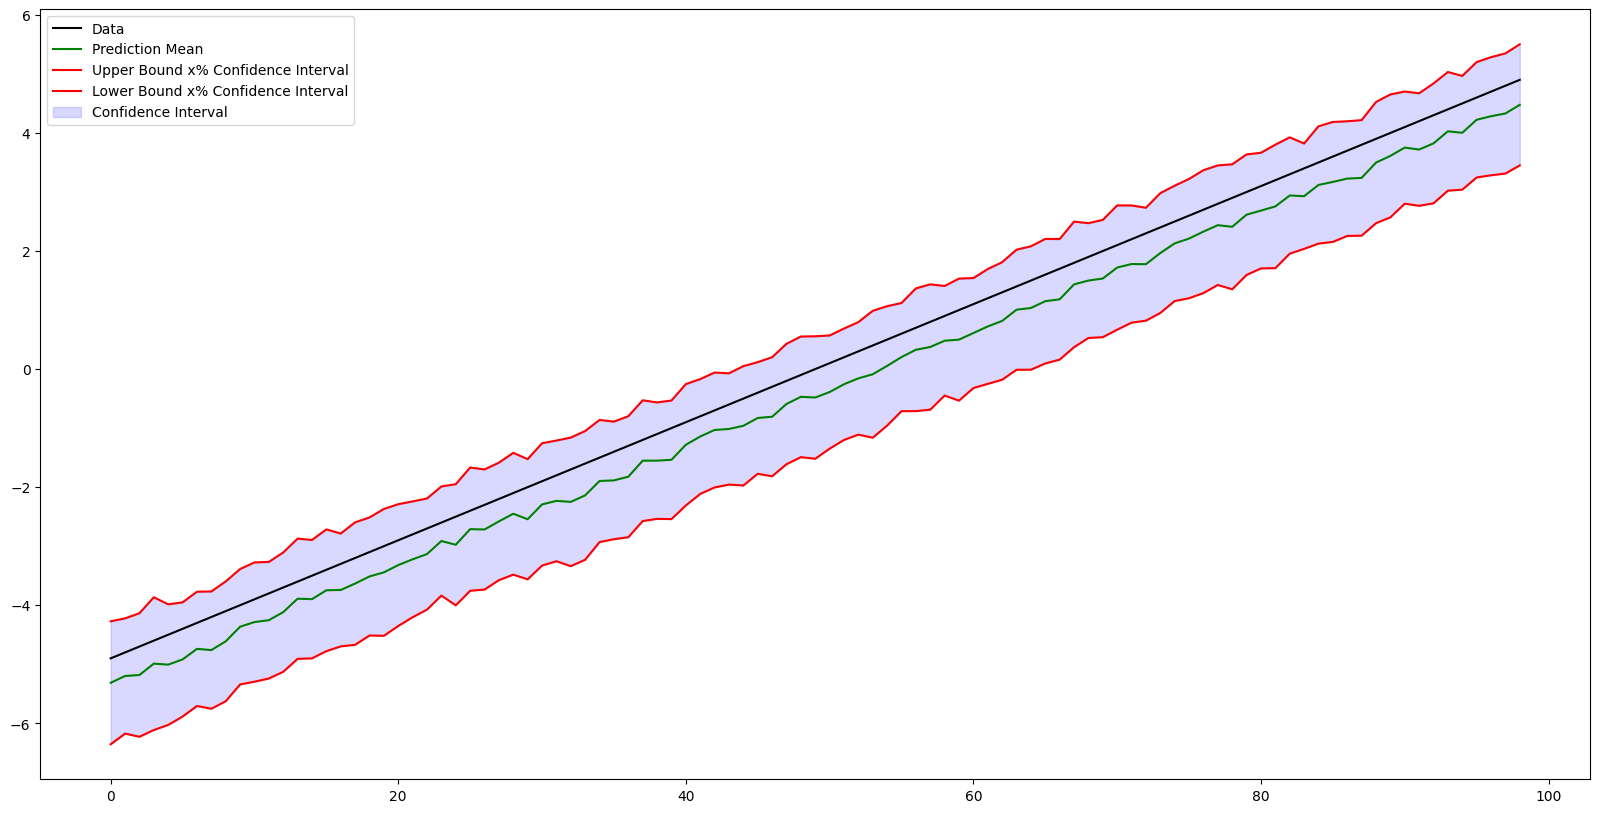

In [14]:
bnn.predict_on_seen_data()
bnn.visualize_predictions()

## On Sinusoidal Data

In [35]:
input_layer = [3]
hidden_layers = [4, 2, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)

window_size = 3
feature_data = generate_windowed_dataset(y_data, window_size)
target_data = y_data.reshape(-1, 1, 1)[window_size-1:]

n_epochs = 100
learning_rate = 0.001

In [ ]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn.generate_m()
bnn.generate_v()
bnn.train(n_epochs)

In [ ]:
bnn.visualize_performance()

In [ ]:
bnn.predict_on_seen_data()
bnn.visualize_predictions()